In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
EV_data = pd.read_csv(r"C:\Data Analysis - Files\Final Project\ev_battery_charging_data.csv")
EV_data.head()


,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2


In [42]:
print (EV_data.shape)
EV_data = EV_data.dropna() # to remove duplicate
EV_data.info()

(1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Ch

In [43]:
EV_data['Battery Power (W)'] = EV_data['Voltage (V)'] * EV_data['Current (A)']

In [44]:
EV_data['Charging Speed'] = EV_data['Current (A)'] / (EV_data['Charging Cycles'] + 1)

In [45]:
EV_data['Temp Diff'] = EV_data['Battery Temp (°C)'] - EV_data['Ambient Temp (°C)']

In [46]:
EV_data['Energy Efficiency Ratio'] = EV_data['Efficiency (%)'] / (EV_data['Charging Duration (min)'] + 1)

In [47]:
EV_data['Depth of Discharge (DOD) (%)'] = 100 - EV_data['SOC (%)']

In [48]:
EV_data['SoC Change Per Cycle'] = EV_data['SOC (%)'] / (EV_data['Charging Cycles'] + 1)

In [49]:
EV_data['Charging Stress'] = EV_data['Current (A)'] * EV_data['Battery Temp (°C)']

In [50]:
EV_data['Temperature Stress'] = EV_data['Temp Diff'] / (EV_data['Charging Duration (min)'] + 1)

In [51]:
EV_data['Battery Health (%)'] = 100 - EV_data['Degradation Rate (%)']

In [52]:
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,...,Optimal Charging Duration Class,Battery Power (W),Charging Speed,Temp Diff,Energy Efficiency Ratio,Depth of Discharge (DOD) (%),SoC Change Per Cycle,Charging Stress,Temperature Stress,Battery Health (%)
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,...,1,121.785592,0.296934,7.014142,1.627455,56.291389,0.386802,1122.501184,0.116198,91.194904
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,...,1,125.023425,0.080772,4.824981,1.427532,4.435712,0.239509,1158.072264,0.070599,87.813140
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,...,2,376.420817,0.520244,-5.193861,0.913379,24.120545,0.431133,2289.929650,-0.048789,86.167664
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,...,1,130.244235,0.214961,14.419484,1.784281,36.120736,0.423041,1054.840902,0.262170,90.681126
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,...,2,140.128769,0.038868,13.449930,0.904576,75.958322,0.027104,1083.733798,0.124577,88.312423


In [53]:
EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

In [54]:
##### Outier removal #####

In [55]:
# print object type columns

cat_columns = EV_data.select_dtypes(include=["object"]).columns
print("Categorical Columns:", cat_columns)


Categorical Columns: Index(['Charging Mode', 'Battery Type', 'EV Model'], dtype='object')


In [56]:
## One-Hot Encoding (OHE)

EV_data = pd.get_dummies(EV_data, columns=["Charging Mode",'Battery Type','EV Model'], drop_first=True)
EV_data.head()

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class,...,Depth of Discharge (DOD) (%),SoC Change Per Cycle,Charging Stress,Temperature Stress,Battery Health (%),Charging Mode_Normal,Charging Mode_Slow,Battery Type_LiFePO4,EV Model_Model B,EV Model_Model C
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,98.238981,112,1,...,56.291389,0.386802,1122.501184,0.116198,91.194904,False,False,False,True,False
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,97.562628,398,1,...,4.435712,0.239509,1158.072264,0.070599,87.813140,False,False,True,False,False
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,97.233533,175,2,...,24.120545,0.431133,2289.929650,-0.048789,86.167664,False,True,True,False,False
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,98.136225,150,1,...,36.120736,0.423041,1054.840902,0.262170,90.681126,False,False,True,True,False
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,97.662485,886,2,...,75.958322,0.027104,1083.733798,0.124577,88.312423,False,False,False,False,True


In [57]:
# Convert all boolean columns to int (0/1) # as for removing outlier it need tobe in integer type

EV_data = EV_data.astype({col: int for col in EV_data.select_dtypes(include=['bool']).columns})

EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Battery Power (W)                1000 non-null   float64
 11  Charging Speed                   1000 non-null   float64
 12  Temp Diff            

<Figure size 1000x800 with 0 Axes>

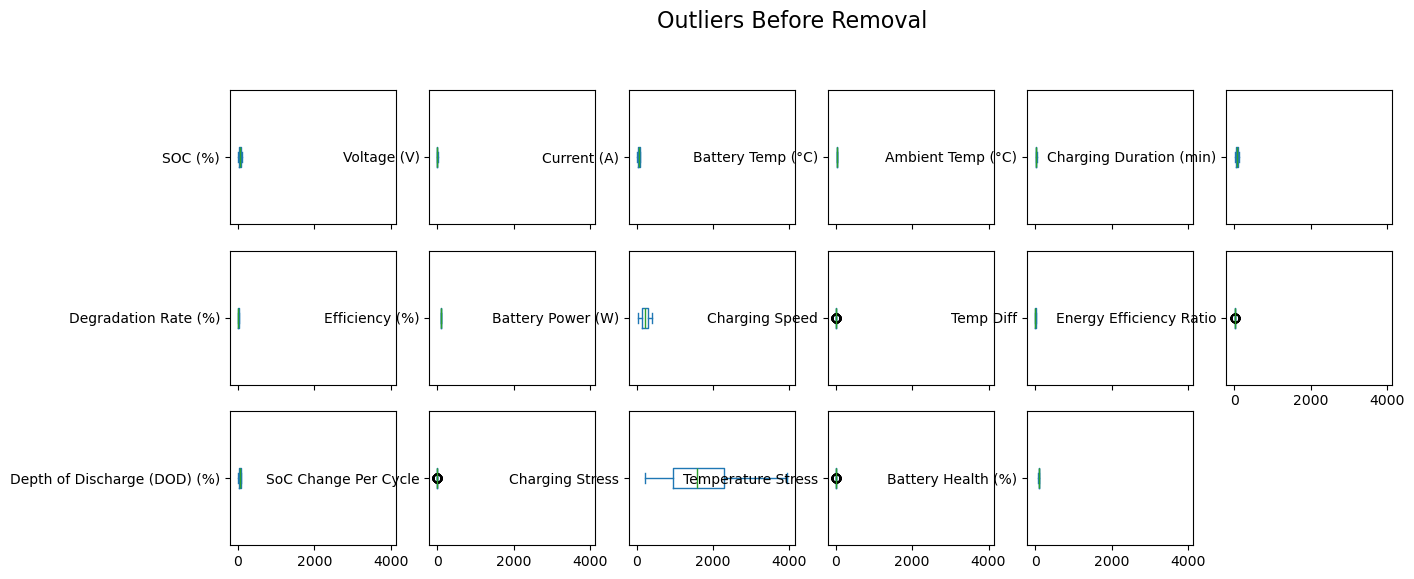

In [58]:
# Set plot size
plt.figure(figsize=(10, 8))

# Create boxplots for each numerical column
EV_data.select_dtypes(include=["float"]).plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 8), vert=False)

plt.suptitle("Outliers Before Removal", fontsize=16)
plt.show()

In [59]:
# Why use IQR?
# ✔ Robust to extreme outliers (not affected by large deviations).
# ✔ Works well for non-normal data distributions (common in battery data).
# ✔ Doesn't remove too many points unless there are significant outliers.

Q1 = EV_data.quantile(0.25)  # 25th percentile
Q3 = EV_data.quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Interquartile range

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
EV_Data_cleaned = EV_data[~((EV_data < lower_bound) | (EV_data > upper_bound)).any(axis=1)]

<Figure size 1000x500 with 0 Axes>

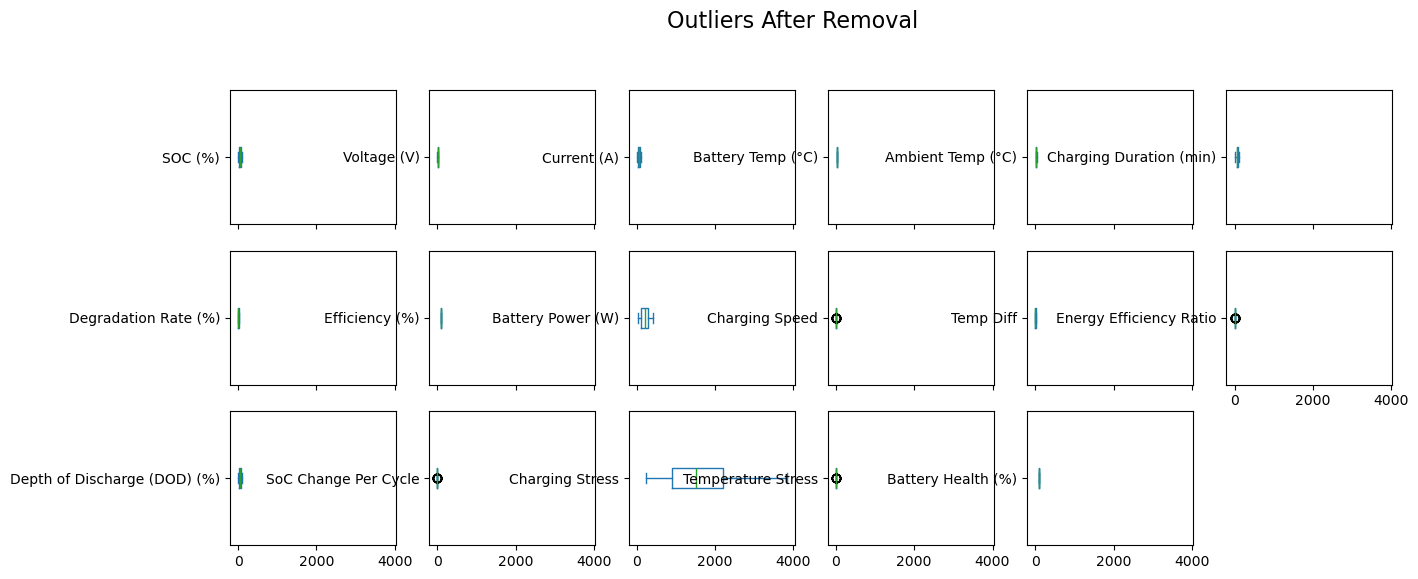

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Efficiency (%)                   1000 non-null   float64
 8   Charging Cycles                  1000 non-null   int64  
 9   Optimal Charging Duration Class  1000 non-null   int64  
 10  Battery Power (W)                1000 non-null   float64
 11  Charging Speed                   1000 non-null   float64
 12  Temp Diff            

In [60]:
# Set plot size
plt.figure(figsize=(10, 5))

# Create boxplots for cleaned data
EV_Data_cleaned.select_dtypes(include=["float"]).plot(kind="box", subplots=True, layout=(4, 6), figsize=(15, 8), vert=False)

plt.suptitle("Outliers After Removal", fontsize=16)
plt.show()

EV_data.info()  ## there is no outlier

In [61]:
# 📌 Why use Z-Score?
# ✔ Good for normally distributed data.
# ✔ More mathematically rigorous, using standard deviation as a measure.
# ❌ Not robust to skewed data (can remove valid extreme values in non-normal distributions).

from scipy import stats
EV_data = EV_data[(np.abs(stats.zscore(EV_data)) < 3).all(axis=1)]

EV_data.info()  ## there is no outlier

<class 'pandas.core.frame.DataFrame'>
Index: 942 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          942 non-null    float64
 1   Voltage (V)                      942 non-null    float64
 2   Current (A)                      942 non-null    float64
 3   Battery Temp (°C)                942 non-null    float64
 4   Ambient Temp (°C)                942 non-null    float64
 5   Charging Duration (min)          942 non-null    float64
 6   Degradation Rate (%)             942 non-null    float64
 7   Efficiency (%)                   942 non-null    float64
 8   Charging Cycles                  942 non-null    int64  
 9   Optimal Charging Duration Class  942 non-null    int64  
 10  Battery Power (W)                942 non-null    float64
 11  Charging Speed                   942 non-null    float64
 12  Temp Diff                  

In [62]:
EV_data_ML = EV_data[['SOC (%)', 'Voltage (V)', 'Current (A)', 'Battery Temp (°C)', 'Charging Duration (min)', 'Degradation Rate (%)', 'Efficiency (%)', 'Charging Cycles', 'Battery Power (W)', 'Charging Stress', 'Temperature Stress', 'Battery Health (%)']]
EV_data_ML

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Battery Power (W),Charging Stress,Temperature Stress,Battery Health (%)
0,43.708611,3.629593,33.553512,33.454060,59.363552,8.805096,98.238981,112,121.785592,1122.501184,0.116198,91.194904
1,95.564288,3.879331,32.228092,35.933628,67.343566,12.186860,97.562628,398,125.023425,1158.072264,0.070599,87.813140
2,75.879455,4.111062,91.562912,25.009358,105.454739,13.832336,97.233533,175,376.420817,2289.929650,-0.048789,86.167664
3,63.879264,4.012557,32.459158,32.497482,54.000439,9.318874,98.136225,150,130.244235,1054.840902,0.262170,90.681126
4,24.041678,4.064593,34.475475,31.434920,106.964968,11.687577,97.662485,886,140.128769,1083.733798,0.124577,88.312423
...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,88.443536,9.724521,98.055096,236,347.979862,2534.549789,-0.045904,90.275479
996,92.558222,4.169630,24.154589,26.688024,70.322041,11.822482,97.635504,957,100.715704,644.638234,0.130400,88.177518
997,22.313677,3.548271,37.880907,27.891446,96.514885,10.553163,97.889367,997,134.411710,1056.553293,0.064960,89.446837
998,95.521362,3.539938,36.104098,30.598812,68.529063,12.016764,97.596647,435,127.806279,1104.742494,-0.010299,87.983236


In [63]:
## Step 1: Select Features and Target

# Define feature set (keeping both old & new features for now)
X = EV_data_ML.drop(columns=['Battery Health (%)', 'Degradation Rate (%)'])

# Define target variable
y = EV_data_ML['Battery Health (%)']


In [64]:
## Step 2: Train-Test Split

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

Training Size: (753, 10)
Testing Size: (189, 10)


In [65]:
## Step 3: Standardize Numerical Features

# Why Standardization?

# Ensures all features have the same scale for ML models like Linear Regression, XGBoost, etc.
# Prevents features with larger values from dominating others.

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data & transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [66]:
## Step 4: Why try multiple models?

# Random Forest handles non-linearity well.
# XGBoost is efficient and handles missing data better.
# Best model is chosen based on performance.

In [67]:
## Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [68]:
## XGBoost Regressor

from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [69]:
## Step 5: Evaluate Model Performance

# Which Model is Better?

# Lower MAE → More accurate predictions.
# Higher R² Score → Better explanation of battery health variations.
# We choose the best-performing model.

from sklearn.metrics import mean_absolute_error, r2_score

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"Random Forest - MAE: {mae_rf}, R² Score: {r2_rf}")
print(f"XGBoost - MAE: {mae_xgb}, R² Score: {r2_xgb}")


Random Forest - MAE: 0.014138176430858445, R² Score: 0.9997715815326166
XGBoost - MAE: 0.02334804902811903, R² Score: 0.9996398752576368


C:\Users\Karan\AppData\Local\Temp\ipykernel_17376\3409621620.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette="viridis")


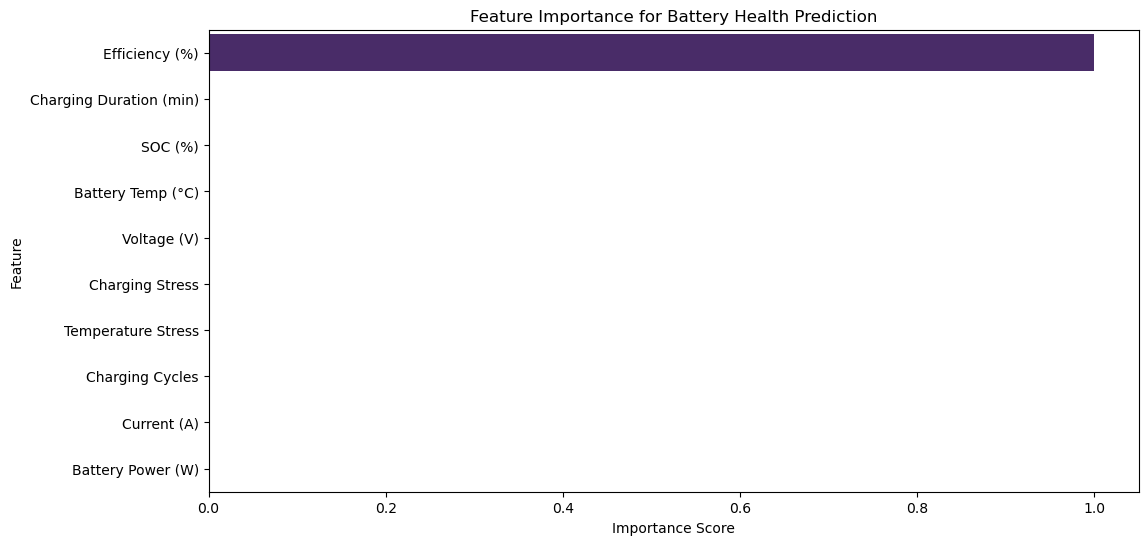

In [70]:
## Step 6: Feature Importance Analysis

# Get feature importance from Random Forest model
feature_importance = rf_model.feature_importances_

# Convert to DataFrame
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette="viridis")
plt.title("Feature Importance for Battery Health Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()



In [71]:
correlation_matrix = EV_data.corr
print (correlation_matrix)

<bound method DataFrame.corr of        SOC (%)  Voltage (V)  Current (A)  Battery Temp (°C)  \
0    43.708611     3.629593    33.553512          33.454060   
1    95.564288     3.879331    32.228092          35.933628   
2    75.879455     4.111062    91.562912          25.009358   
3    63.879264     4.012557    32.459158          32.497482   
4    24.041678     4.064593    34.475475          31.434920   
..         ...          ...          ...                ...   
995  18.242387     3.959869    87.876618          28.842141   
996  92.558222     4.169630    24.154589          26.688024   
997  22.313677     3.548271    37.880907          27.891446   
998  95.521362     3.539938    36.104098          30.598812   
999  50.140520     3.697531    88.427263          23.227347   

     Ambient Temp (°C)  Charging Duration (min)  Degradation Rate (%)  \
0            26.439918                59.363552              8.805096   
1            31.108647                67.343566             12.18

In [ ]:
## for streamlit step by step

# st.write(f"Joblib version in Streamlit Cloud: {joblib.__version__}")

# # Get current directory
# current_directory = os.getcwd()
# st.write(f"Current Directory: {current_directory}")

# # List all files in the directory
# st.write("Files in directory:", os.listdir(current_directory))

# # Check if the model file exists
# model_filename = "battery_health_L_model.joblib"
# model_path = os.path.join(current_directory, model_filename)

# if os.path.exists(model_path):
#     st.write("Model file found. Loading...", model_path)
#     model = joblib.load(model_path)
# else:
#     st.error(f"Model file '{model_filename}' not found! Please check the file path.")